# Análise de Preço de Eletronicos

In [1]:
## importando as bibliotecas de analise
import math
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
#importando os dados para análise
df = pd.read_csv('consumer_electronics_sales_data.csv')

## Análise Exploratória

In [3]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [5]:
df.drop(columns = 'ProductID' , inplace = True)

In [6]:
df1 = df.groupby('ProductBrand')['ProductCategory'].count().reset_index(name = 'CountBrand')

In [7]:
df1.sort_values('CountBrand',ascending=True)


,ProductBrand,CountBrand
0,Apple,1760
2,Other Brands,1776
4,Sony,1790
1,HP,1820
3,Samsung,1854


In [8]:
df1 = pd.merge(df, df1[['ProductBrand', 'CountBrand']], on='ProductBrand', how='left')


In [9]:
df1

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,CountBrand
0,Smartphones,Other Brands,312.949668,18,0,2,1,0,1776
1,Smart Watches,Samsung,980.389404,35,1,7,2,1,1854
2,Tablets,Samsung,2606.718293,63,0,1,5,1,1854
3,Smartphones,Samsung,870.395450,63,1,10,3,1,1854
4,Tablets,Sony,1798.955875,57,0,17,3,0,1790
...,...,...,...,...,...,...,...,...,...
8995,Smart Watches,Samsung,1041.149163,36,1,16,4,0,1854
8996,Smartphones,Samsung,1485.694311,57,0,5,1,1,1854
8997,Headphones,Samsung,2887.369597,28,0,18,4,0,1854
8998,Tablets,HP,1490.453964,38,0,4,2,1,1820


In [10]:
df2= df1.groupby('ProductBrand')['ProductPrice'].sum().round().reset_index(name ='TotalSelling')

In [11]:
df2.sort_values('TotalSelling',ascending=True)

,ProductBrand,TotalSelling
0,Apple,2644401.0
2,Other Brands,2662858.0
4,Sony,2729179.0
1,HP,2802751.0
3,Samsung,2907674.0


In [12]:
df1 = pd.merge(df1,df2[['ProductBrand', 'TotalSelling']], on='ProductBrand', how='left')

In [13]:
df1

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,CountBrand,TotalSelling
0,Smartphones,Other Brands,312.949668,18,0,2,1,0,1776,2662858.0
1,Smart Watches,Samsung,980.389404,35,1,7,2,1,1854,2907674.0
2,Tablets,Samsung,2606.718293,63,0,1,5,1,1854,2907674.0
3,Smartphones,Samsung,870.395450,63,1,10,3,1,1854,2907674.0
4,Tablets,Sony,1798.955875,57,0,17,3,0,1790,2729179.0
...,...,...,...,...,...,...,...,...,...,...
8995,Smart Watches,Samsung,1041.149163,36,1,16,4,0,1854,2907674.0
8996,Smartphones,Samsung,1485.694311,57,0,5,1,1,1854,2907674.0
8997,Headphones,Samsung,2887.369597,28,0,18,4,0,1854,2907674.0
8998,Tablets,HP,1490.453964,38,0,4,2,1,1820,2802751.0


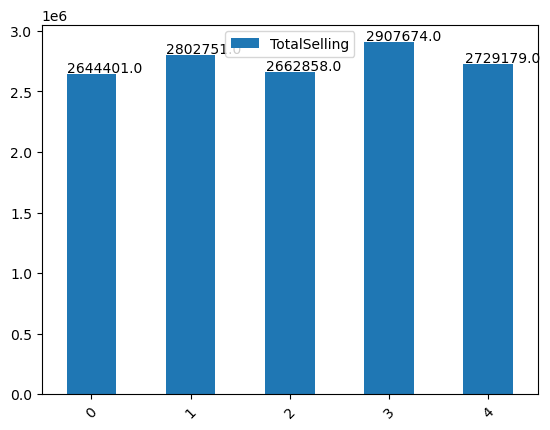

In [14]:
ax = df2.plot(kind = 'bar')
plt.xticks(rotation = 45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Mostrar o gráfico
plt.show()

In [15]:
df3 = df.groupby(['ProductCategory','CustomerAge']).size().reset_index(name = 'Consumers')

In [16]:
df3

,ProductCategory,CustomerAge,Consumers
0,Headphones,18,36
1,Headphones,19,33
2,Headphones,20,33
3,Headphones,21,47
4,Headphones,22,43
...,...,...,...
255,Tablets,65,39
256,Tablets,66,44
257,Tablets,67,38
258,Tablets,68,30


In [17]:
df3 = df3.sort_values('Consumers', ascending=False).drop_duplicates('ProductCategory')

In [18]:
df3

,ProductCategory,CustomerAge,Consumers
58,Laptops,24,55
3,Headphones,21,47
169,Smartphones,31,46
148,Smart Watches,62,45
256,Tablets,66,44


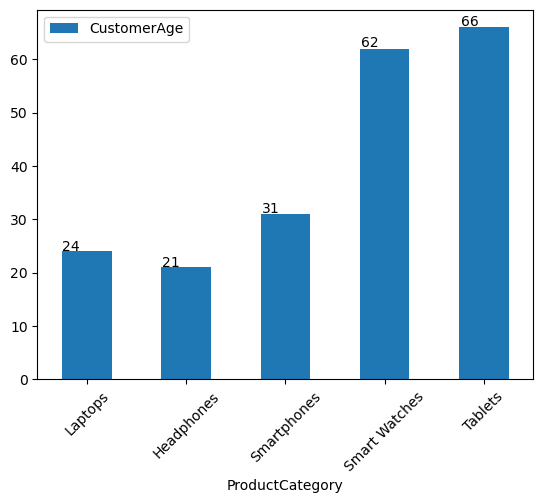

In [23]:


# Para plotar a idade média do cliente por categoria de produto
ax= df3.plot(kind='bar', x='ProductCategory', y='CustomerAge', legend=True)
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


plt.show()


# Ou para plotar o número de consumidores por categoria de produto
#d3f.plot(kind='bar', x='ProductCategory', y='Consumers', legend=True)
#plt.show()
